### Two standard examples for a system coupled to an external field

In many physical systems, an extensive generalized coordinate couples linearly to an external field, leading to a generalized ensemble. These systems exhibit behavior analogous to ensembles with conserved quantities, as fluctuations in the generalized coordinate follow similar statistical principles.

Here, we go in detail through two examples: An ising spin in a magnetic field and a freely jointed polymer chain under an external force. 


---

## Section 1: Ising Paramagnet

### 1.1 Derivation of the Partition Function
The Ising paramagnet consists of $N$ non-interacting spins in an external magnetic field $B_{ext}$. Each spin can take two values, $+1$ or $-1$, corresponding to alignment or anti-alignment with the field.

The energy of a single spin is given by:

$$
E = -\mu B_{ext} \sigma_i
$$

where $\sigma_i = \pm 1$ is the spin in the direction of the external field and $\mu$ is the magnetic moment of each spin.

The partition function for a single spin is:

$$
Z_1 = \sum_{\sigma_i = \pm 1} \exp(-\beta E) = \exp(\beta \mu B_{ext}) + \exp(-\beta \mu B_{ext})
$$

Simplifying, we obtain:

$$
Z_1 = 2 \cosh(\beta \mu B_{ext})
$$

For $N$ independent spins, the total partition function is:

$$
Z = \left( 2 \cosh(\beta \mu B_{ext}) \right)^N
$$

### 1.2 Free Energy
The free energy $F$ is related to the partition function by:

$$
F = -\frac{1}{\beta} \log Z
$$

Substituting the partition function:

$$
F = -\frac{N}{\beta} \log(2 \cosh(\beta \mu H))
$$

### 1.2 Expectation Value of Magnetization
The magnetization is given by:

$$
\langle M \rangle = \frac{1}{\beta} \frac{\partial \log Z}{\partial H} = N \mu \tanh(\beta \mu B_{ext})
$$

### 1.3 Magnetic Susceptibility
The magnetic susceptibility is:

$$
\chi = \frac{\partial \langle M \rangle}{\partial B_{ext}} = \frac{N \mu^2 \beta}{1 + \beta \mu^2 \cosh^{-2}(\beta \mu B_{ext})}
$$



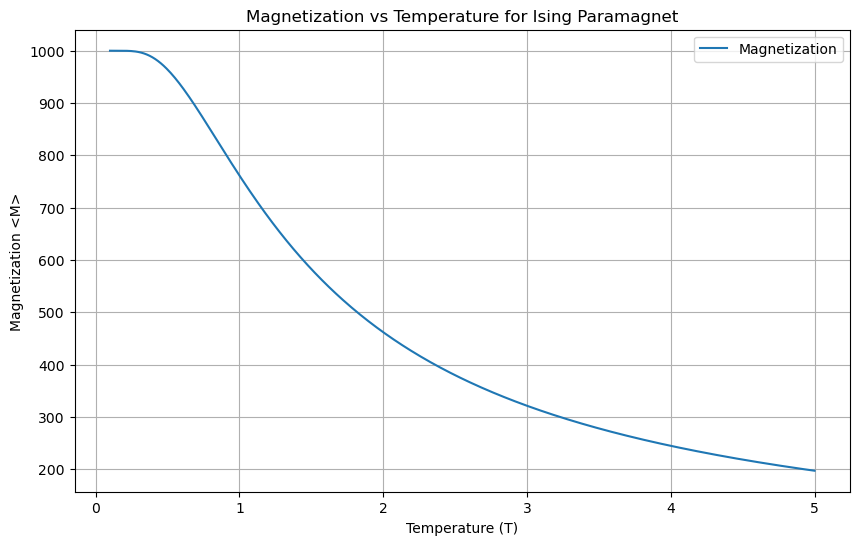

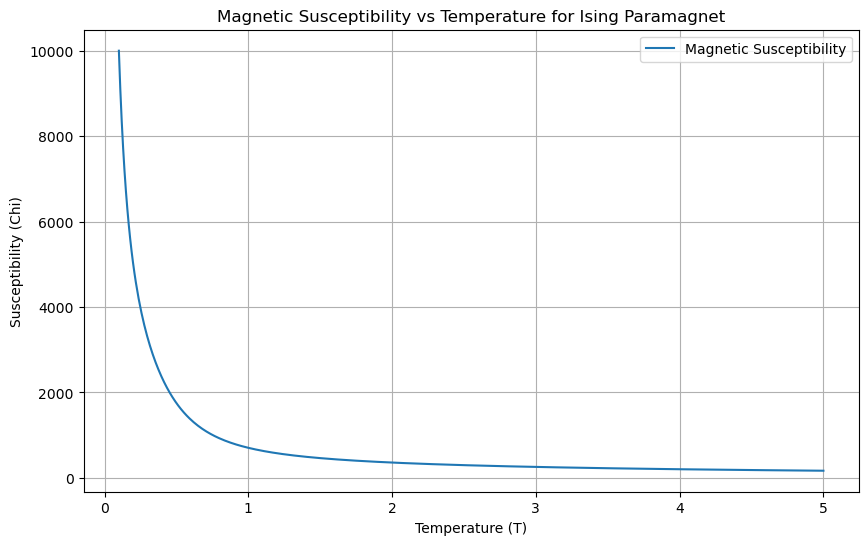

In [5]:
# Python code to compute and visualize the results for the Ising Paramagnet
import numpy as np
import matplotlib.pyplot as plt

# Function definitions
def magnetization(N, beta, mu, H):
    return N * mu * np.tanh(beta * mu * H)

def susceptibility(N, beta, mu, H):
    return N * mu**2 * beta / (1 + beta * mu**2 * np.cosh(beta * mu * H)**(-2))

# Parameters
N = 1000  # Number of spins
mu = 1  # Magnetic moment
T = np.linspace(0.1, 5, 500)  # Temperature range (in units of k_B)
H = 1  # External magnetic field
beta = 1 / T  # Inverse temperature

# Calculations
magnetizations = magnetization(N, beta, mu, H)
susceptibilities = susceptibility(N, beta, mu, H)

# Plot magnetization
plt.figure(figsize=(10, 6))
plt.plot(T, magnetizations, label='Magnetization')
plt.xlabel('Temperature (T)')
plt.ylabel('Magnetization <M>')
plt.title('Magnetization vs Temperature for Ising Paramagnet')
plt.legend()
plt.grid(True)
plt.show()

# Plot susceptibility
plt.figure(figsize=(10, 6))
plt.plot(T, susceptibilities, label='Magnetic Susceptibility')
plt.xlabel('Temperature (T)')
plt.ylabel('Susceptibility (Chi)')
plt.title('Magnetic Susceptibility vs Temperature for Ising Paramagnet')
plt.legend()
plt.grid(True)
plt.show()





## Section 2: Freely Jointed Chain in an External Force Field

## Section 2: Freely Jointed Chain in an External Force Field

### 2.1 Derivation of the Partition Function
Consider a freely jointed chain with $N$ segments, each of length $l$, in an external force field $F$. 

![Freely jointed chain](FJC.png)

The energy of the system is:

$$
E = -F \cdot R = -F l \sum_{i=1}^N \cos \theta_i
$$

where $\theta_i$ is the angle between segment $i$ and the direction of the force.

The partition function for a single segment is:

$$
Z_1 = \int_0^{\pi} \exp(\beta F l \cos \theta) \sin \theta \, d\theta
$$

Approximating for large $\beta F l$, we have:

$$
Z_1 \approx \frac{\sinh(\beta F l)}{\beta F l}
$$

For $N$ independent segments, the total partition function is:

$$
Z = \left( \frac{\sinh(\beta F l)}{\beta F l} \right)^N
$$

### 2.2 Expectation Value of End-to-End Distance
The end-to-end distance is:

$$
\langle R \rangle = N l L(\beta F l)
$$

where $L(x) = \coth(x) - \frac{1}{x}$ is the Langevin function.

### 2.4 Linear Response to an Increase in Force
In the linear response regime (small $F$), the end-to-end distance is approximately proportional to the applied force:

$$
\langle R \rangle \approx \frac{N l^2 \beta F}{3}
$$

The proportionality constant, $\chi_R$, represents the response coefficient:

$$
\chi_R = \frac{N l^2 \beta}{3}
$$


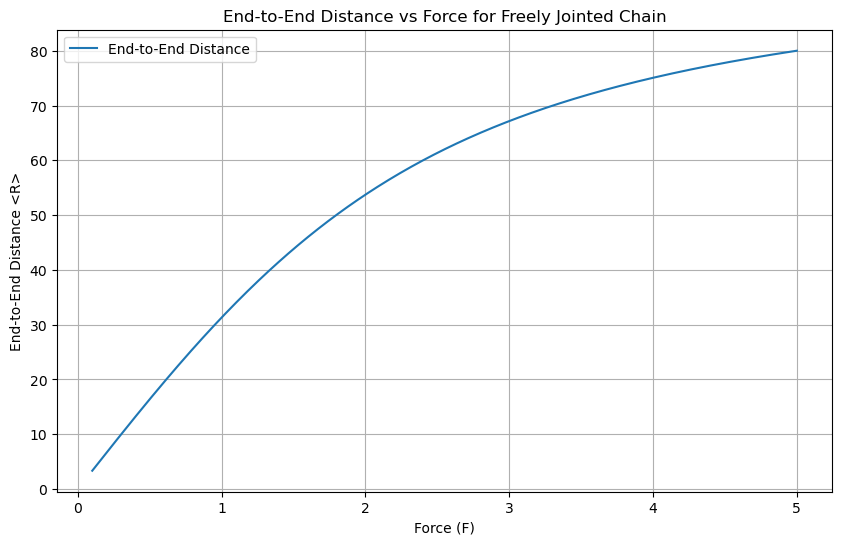

In [4]:
# Python code to compute and visualize the results for the Freely Jointed Chain
# Function definitions
import numpy as np

def langevin(x):
    return (np.exp(x) + np.exp(-x)) / (np.exp(x) - np.exp(-x)) - 1 / x

def end_to_end_distance(N, beta, l, F):
    return N * l * langevin(beta * F * l)

# Parameters
N = 100  # Number of segments
l = 1  # Length of each segment
F = np.linspace(0.1, 5, 500)  # Force range
T = 1  # Fixed temperature
beta = 1 / T  # Inverse temperature

# Calculations
end_to_end_distances = end_to_end_distance(N, beta, l, F)

# Plot end-to-end distance
plt.figure(figsize=(10, 6))
plt.plot(F, end_to_end_distances, label='End-to-End Distance')
plt.xlabel('Force (F)')
plt.ylabel('End-to-End Distance <R>')
plt.title('End-to-End Distance vs Force for Freely Jointed Chain')
plt.legend()
plt.grid(True)
plt.show()